# Digits recognition using Deep Learning
### Using Deep Learning to recognise hand-written digits. 

My first attempts with neural networks. The project includes two trained models. One "naive" using a regular perceptron and the other using the Convolutional Neural Network

## Data preprocessing

In [1]:
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing MNIST dataset with handwritten digits 
from sklearn.datasets import fetch_openml
df = fetch_openml("mnist_784", version=1)

In [3]:
#dividing dataset into data and target datasets
X, y = np.array(df["data"]), np.array(df["target"])
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
#y data are str type, let's transform it
print(type(y[0]))
y = y.astype("uint8")
print(type(y[0]))

<class 'str'>
<class 'numpy.uint8'>


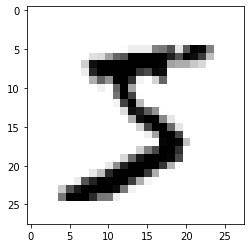

In [7]:
#showing sample image of number
plt.imshow(X[0].reshape(28,28), cmap = "binary")
plt.show()

In [8]:
#scale data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
#splitting datasets into train and test sets
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.10, random_state=42)

In [10]:
X_train_full.shape, y_train_full.shape

((63000, 784), (63000,))

In [11]:
#validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## First model:  Building Perceptron model

In [12]:
#model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(units=300, activation="relu", input_shape=[784, ]),
    Dense(units=300, activation="relu"),
    Dense(units=10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics="accuracy")

In [15]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1813/1813 [==============================] - 7s 3ms/step - loss: 0.5897 - accuracy: 0.8493 - val_loss: 0.3141 - val_accuracy: 0.9138
Epoch 2/30
1813/1813 [==============================] - 6s 3ms/step - loss: 0.2818 - accuracy: 0.9185 - val_loss: 0.2548 - val_accuracy: 0.9290
Epoch 3/30
1813/1813 [==============================] - 5s 3ms/step - loss: 0.2295 - accuracy: 0.9342 - val_loss: 0.2208 - val_accuracy: 0.9390
Epoch 4/30
1813/1813 [==============================] - 5s 3ms/step - loss: 0.1942 - accuracy: 0.9437 - val_loss: 0.1951 - val_accuracy: 0.9468
Epoch 5/30
1813/1813 [==============================] - 5s 3ms/step - loss: 0.1684 - accuracy: 0.9516 - val_loss: 0.1774 - val_accuracy: 0.9504
Epoch 6/30
1813/1813 [==============================] - 5s 3ms/step - loss: 0.1489 - accuracy: 0.9574 - val_loss: 0.1580 - val_accuracy: 0.9550
Epoch 7/30
1813/1813 [==============================] - 5s 3ms/step - loss: 0.1333 - accuracy: 0.9621 - val_loss: 0.1461 - val_accuracy:

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.title("Learning curve of first model")
plt.grid(True)
plt.ylim(0,1)
plt.xlim(0,)
plt.show()

In [17]:
model.evaluate(X_test, y_test)

219/219 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9743


[0.08348093181848526, 0.9742857217788696]

In [21]:
#saving model
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

model.save("perceptrone_model")

In [24]:

m = load_model("perceptrone_model")

In [25]:
m.evaluate(X_test, y_test)

219/219 [==============================] - 1s 3ms/step - loss: 0.0835 - accuracy: 0.9743


[0.08348093181848526, 0.9742857217788696]

In [26]:
#reshaping data to be original image shape
X_train =X_train.reshape(-1, 28,28,1) 
X_test = X_test.reshape(-1, 28,28,1)
X_valid = X_valid.reshape(-1, 28,28,1)

In [32]:
#building model
from keras.layers import (
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model2 = Sequential([
    Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"),
    Dropout(0.2),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"),
    BatchNormalization(),
    MaxPool2D((2, 2), strides=2, padding="same"),
    Flatten(),
    Dense(units=512, activation="relu"),
    Dropout(0.3),
    Dense(units=10, activation="softmax")
])

In [43]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)      

In [38]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [39]:
#training model
history2= model2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1813/1813 [==============================] - 14s 5ms/step - loss: 0.1737 - accuracy: 0.9469 - val_loss: 0.0650 - val_accuracy: 0.9808
Epoch 2/30
1813/1813 [==============================] - 8s 4ms/step - loss: 0.0664 - accuracy: 0.9796 - val_loss: 0.0530 - val_accuracy: 0.9854
Epoch 3/30
1813/1813 [==============================] - 8s 5ms/step - loss: 0.0501 - accuracy: 0.9837 - val_loss: 0.0455 - val_accuracy: 0.9854
Epoch 4/30
1813/1813 [==============================] - 8s 4ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0358 - val_accuracy: 0.9898
Epoch 5/30
1813/1813 [==============================] - 9s 5ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 6/30
1813/1813 [==============================] - 8s 4ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0309 - val_accuracy: 0.9892
Epoch 7/30
1813/1813 [==============================] - 8s 5ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.0284 - val_accuracy

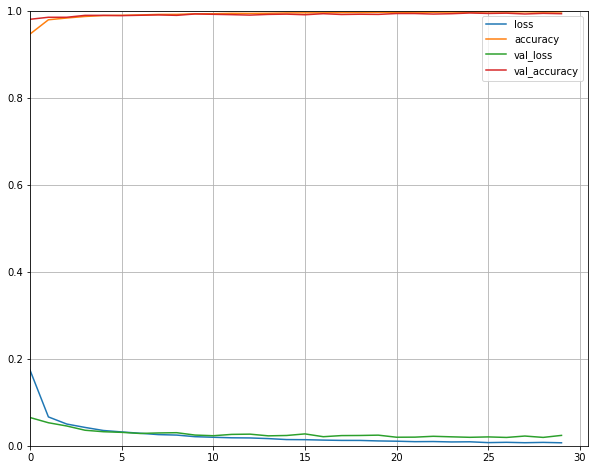

In [40]:
#learning curves
pd.DataFrame(history2.history).plot(figsize=(10,8))
plt.grid(True)
plt.ylim(0,1)
plt.xlim(0,)
plt.show()

In [42]:
#evaluation of the model
model2.evaluate(X_test, y_test)

219/219 [==============================] - 1s 6ms/step - loss: 0.0283 - accuracy: 0.9900


[0.02827921137213707, 0.9900000095367432]

In [ ]:
#99% accuracy, nice :)

In [44]:
#saving the model
model.save("CNN_model")